In [1]:
import os

fp = "/Users/sreevaatsav/Downloads/MTDETR/moment_detr/data"

In [2]:
os.listdir(fp)

['highlight_test_release.jsonl',
 'LICENSE',
 'README.md',
 'highlight_train_release.jsonl',
 'highlight_val_release.jsonl',
 'subs_train.jsonl']

In [3]:
os.path.join(fp, os.listdir(fp)[3])

'/Users/sreevaatsav/Downloads/MTDETR/moment_detr/data/highlight_train_release.jsonl'

In [4]:
import pandas as pd

train_df = pd.read_json("/Users/sreevaatsav/Downloads/MTDETR/moment_detr/data/highlight_train_release.jsonl", lines = True)
test_df = pd.read_json(os.path.join(fp, os.listdir(fp)[0]), lines = True)
val_df = pd.read_json(os.path.join(fp, os.listdir(fp)[4]), lines = True)

In [133]:
train_df

,qid,query,duration,vid,relevant_clip_ids,saliency_scores,relevant_windows
0,9769,some military patriots takes us through their ...,150,j7rJstUseKg_360.0_510.0,"[36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 4...","[[4, 3, 2], [4, 1, 3], [4, 3, 4], [4, 1, 2], [...","[[72, 82], [84, 94], [96, 106], [108, 118], [1..."
1,10016,Man in baseball cap eats before doing his inte...,150,j7rJstUseKg_210.0_360.0,"[48, 49, 50, 51, 52, 53, 54, 55, 56]","[[2, 3, 3], [4, 3, 2], [2, 3, 1], [2, 3, 0], [...","[[96, 114]]"
2,10078,A man in a white shirt discusses the right to ...,150,j7rJstUseKg_60.0_210.0,"[24, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...","[[0, 2, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], [...","[[48, 50], [76, 120], [122, 138], [140, 146]]"
3,6812,A view of a bamboo fountain of water in a tea ...,150,-Oc6gSWB_HA_60.0_210.0,"[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4...","[[4, 2, 3], [3, 3, 3], [4, 3, 3], [4, 2, 3], [...","[[64, 92]]"
4,9247,The weather map shows large snowfall in the we...,150,G60-kHBEeZA_60.0_210.0,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...","[[2, 4, 2], [3, 4, 2], [3, 4, 2], [2, 4, 2], [...","[[14, 48]]"
...,...,...,...,...,...,...,...
7213,1369,Kids with different face paintings on them,150,Mp7wN80amkQ_360.0_510.0,"[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...","[[2, 4, 4], [2, 4, 4], [3, 4, 4], [3, 4, 4], [...","[[82, 120], [124, 132]]"
7214,2477,Two small children are playing with instrument...,150,Mp7wN80amkQ_60.0_210.0,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...","[[0, 2, 2], [0, 2, 2], [1, 2, 3], [3, 3, 3], [...","[[66, 112]]"
7215,6050,A mom is talking about her son birthday party,150,Mp7wN80amkQ_210.0_360.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[4, 1, 2], [3, 1, 3], [3, 4, 3], [4, 4, 3], [...","[[0, 60], [72, 126]]"
7216,8672,Children at a birthday party are wearing costu...,150,Mp7wN80amkQ_660.0_810.0,"[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6...","[[3, 4, 4], [3, 3, 4], [3, 3, 4], [4, 4, 4], [...","[[102, 132]]"


In [5]:
# pd.read_json(os.path.join(fp, os.listdir(fp)[5]), lines = True)
train_df.shape, val_df.shape

((7218, 7), (1550, 7))

In [6]:
# val_df
train_queries = train_df["query"]
val_queries = val_df["query"]

In [7]:
tv_queries = pd.concat([train_queries,val_queries])
tv_queries.shape

(8768,)

In [8]:
tv_queries

0       some military patriots takes us through their ...
1       Man in baseball cap eats before doing his inte...
2       A man in a white shirt discusses the right to ...
3       A view of a bamboo fountain of water in a tea ...
4       The weather map shows large snowfall in the we...
                              ...                        
1545    A woman showing some vegetables and fruits ins...
1546             Hand shows different foods on the table.
1547    A white plate has different fruits and vegetab...
1548    A woman is making a type of green smoothie in ...
1549       Footage of two eggs being fried on a small pan
Name: query, Length: 8768, dtype: object

In [17]:
# from transformers import AutoTokenizer, AutoModelForTokenClassification
# from transformers import pipeline
# import tqdm as notebook_tqdm


# tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
# model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

# nlp = pipeline("ner", model=model, tokenizer=tokenizer)
# example = list(tv_queries)[1]

In [18]:
# %%time 

# ner_results = nlp(example)
# print(ner_results)

In [21]:
list(tv_queries)[0]

'some military patriots takes us through their safety procedures and measures.'

In [22]:
from flair.data import Sentence
from flair.models import SequenceTagger

# load tagger
tagger = SequenceTagger.load("flair/pos-english")

# make example sentence
sentence = Sentence(list(tv_queries)[0])

# predict NER tags
tagger.predict(sentence)

# print sentence
print(sentence)

# print predicted NER spans
print('The following NER tags are found:')
# iterate over entities and print
for entity in sentence.get_spans('pos'):
    print(entity)


2023-09-12 17:39:48,104 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
Sentence[12]: "some military patriots takes us through their safety procedures and measures." → ["some"/DT, "military"/JJ, "patriots"/NNS, "takes"/VBZ, "us"/PRP, "through"/IN, "their"/PRP$, "safety"/NN, "procedures"/NNS, "and"/CC, "measures"/NNS, "."/.]
The following NER tags are found:


In [57]:
len(sentence)

12

In [35]:
type(sentence)

sentence.get_labels()

['Token[0]: "some"'/'DT' (1.0),
 'Token[1]: "military"'/'JJ' (0.9898),
 'Token[2]: "patriots"'/'NNS' (0.9999),
 'Token[3]: "takes"'/'VBZ' (1.0),
 'Token[4]: "us"'/'PRP' (1.0),
 'Token[5]: "through"'/'IN' (0.9998),
 'Token[6]: "their"'/'PRP$' (1.0),
 'Token[7]: "safety"'/'NN' (1.0),
 'Token[8]: "procedures"'/'NNS' (1.0),
 'Token[9]: "and"'/'CC' (1.0),
 'Token[10]: "measures"'/'NNS' (1.0),
 'Token[11]: "."'/'.' (1.0)]

In [79]:
sentence.get_token(1).get_label().value

'DT'

In [61]:
sentence.get_token(4).text

'takes'

In [63]:
sentence[3]

Token[3]: "takes" → VBZ (1.0)

In [40]:
sentence.get_spans("pos")

[]

In [25]:
tagger.predict(sentence)


In [27]:
req_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

In [41]:
# sentence.get_spans("POS")

[]

In [97]:
from flair.data import Sentence
from flair.models import SequenceTagger

def get_ner_tags(tv_queries):

    req_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

    tagger = SequenceTagger.load("flair/pos-english")

    tv_queries_list = list(tv_queries)


    op = []

    for i in range(len(tv_queries_list)):
        
        sentence = Sentence(tv_queries_list[i])

        tagger.predict(sentence)

        temp_op = []

        for j in range(1,len(sentence)+1):
    
            curr_val = sentence.get_token(j).get_label().value

            # print(curr_val)

            if curr_val in req_tags:

                curr_tok = sentence.get_token(j).text

                temp_op.append(curr_tok)

        op.append(temp_op)

    return op

In [105]:
%%time 

op = get_ner_tags(tv_queries)

2023-09-12 18:17:29,705 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
CPU times: user 42min 55s, sys: 35.2 s, total: 43min 30s
Wall time: 54min 24s


In [109]:
from matplotlib import pyplot as plt 
import seaborn as sns


In [110]:
tot_verbs = []

for va in op:
    tot_verbs += va

In [114]:
# tot_verbs
from collections import Counter

temp_collection  = Counter(tot_verbs)
# sns.countplot(tot_verbs)

In [117]:
temp_collection.most_common(50)[2:]

[('talking', 562),
 ('showing', 448),
 ('wearing', 335),
 ('talks', 323),
 ('walks', 272),
 ('shows', 243),
 ('holds', 235),
 ('walking', 221),
 ('sitting', 208),
 ('holding', 170),
 ('sits', 153),
 ('having', 149),
 ('eating', 137),
 ('has', 131),
 ('playing', 123),
 ('being', 119),
 ('sharing', 117),
 ('stands', 111),
 ('walk', 109),
 ('wears', 107),
 ('shown', 99),
 ('eats', 98),
 ('standing', 97),
 ('driving', 97),
 ('giving', 95),
 ('gives', 94),
 ('have', 92),
 ('looks', 92),
 ('making', 80),
 ('speaks', 78),
 ('getting', 76),
 ('looking', 73),
 ('makes', 71),
 ('gets', 70),
 ('talk', 70),
 ('goes', 70),
 ('drives', 68),
 ('eat', 68),
 ('doing', 62),
 ('make', 61),
 ('puts', 61),
 ('riding', 57),
 ('sit', 56),
 ('speaking', 56),
 ('rides', 53),
 ('hanging', 52),
 ('taking', 52),
 ('trying', 52)]

In [127]:
top_50_verbs = dict(temp_collection.most_common(50)[2:27])

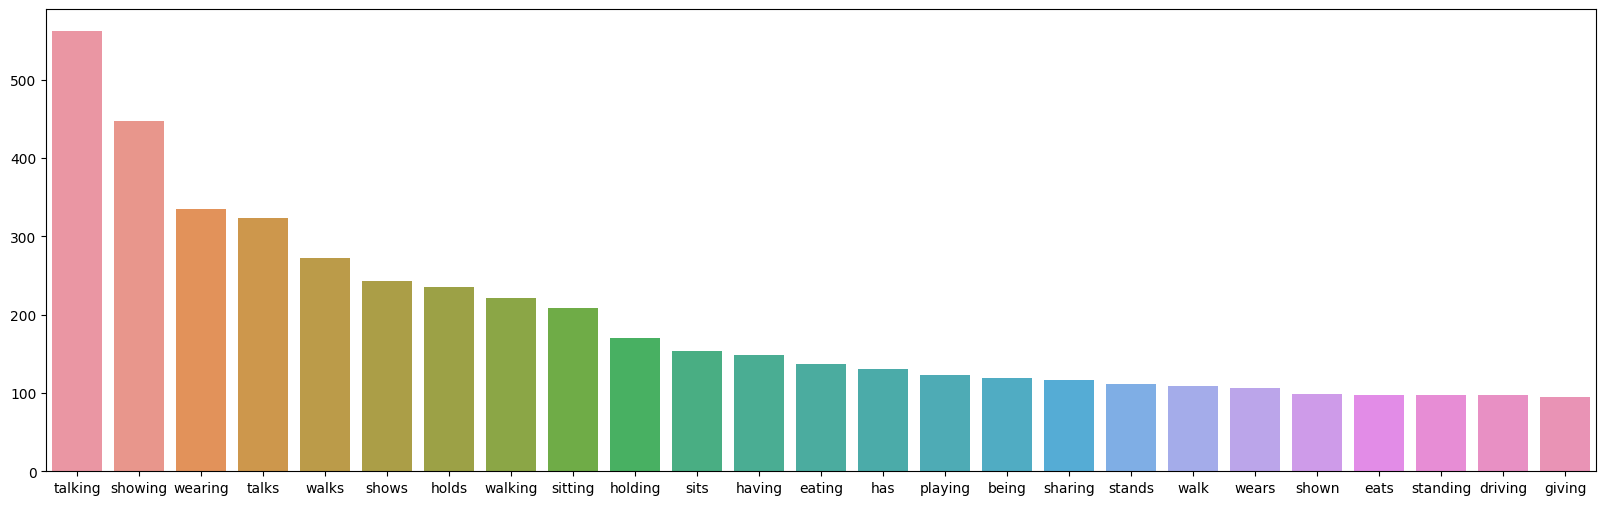

In [132]:
plt.figure(figsize=(20,6))
sns.barplot(x = list(top_50_verbs.keys()), y = list(top_50_verbs.values()))
plt.show()